In [1]:
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Lambda, Conv2D, MaxPooling2D, Cropping2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
lines = []
with open('d:/dl/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [3]:
center_images = []
steering = []
for line in lines:
    correction = 0.2
    image_file = line[0]
    center_image = cv.imread(line[0])
    left_image = cv.imread(line[1])
    right_image = cv.imread(line[2])
    steering_center = float(line[3])
    center_images.append(center_image)
    center_images.append(left_image)
    center_images.append(right_image)
    steering.append(steering_center)
    steering.append(steering_center - correction)
    steering.append(steering_center + correction)

In [4]:
original_training_image = len(center_images)

In [5]:
#augmenting the training data by fliping images and their measurement
for i in range(original_training_image):
    center_images.append(np.fliplr(center_images[i]))
    steering.append(-steering[i])

In [6]:
center_images = np.array(center_images)
steering = np.array(steering)

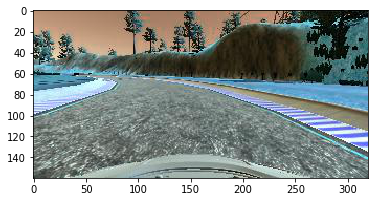

In [7]:
plt.imshow(center_images[0])

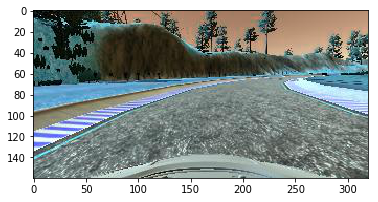

In [8]:
plt.imshow(np.fliplr(center_images[0]))

In [9]:
center_images[0].shape

(160, 320, 3)

In [10]:
len(center_images)

27312

In [11]:
def convert_RGB_to_GRAY(image):
    rgb_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    #rg_img = cv.normalize(rgb_img, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    return rgb_img[:,:, np.newaxis]

In [12]:
def preprocess_image(x):
    gray_image = lambda t : convert_RGB_to_GRAY(t)
    
    x = np.array(list(map(gray_image, x)))
    x = x.astype(float)/128.0
    return x

In [13]:
#center_images = preprocess_image(center_images)

In [4]:
def Lent_model(in_shape, dropout):
    model = Sequential()
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=in_shape))
    model.add(Cropping2D(cropping=((50,20),(0,0))))
    model.add(Conv2D(6,(5,5), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, (5,5), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
    
    return model

In [3]:
def Nvidia_model(in_shape, dropout):
    model = Sequential()
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=in_shape))
    model.add(Cropping2D(cropping=((40,20),(0,0))))

    model.add(Conv2D(24, (5, 5), padding='valid', activation = 'tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(36, (5, 5), padding='valid', activation = 'tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(48, (5, 5), padding='valid', activation = 'tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64,(3, 3), padding='valid', activation = 'tanh'))

    model.add(Conv2D(64,(3,3), padding='valid', activation = 'tanh'))

    model.add(Flatten())
    
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(10))
    model.add(Dense(1))
    
    model.summary();
    
    return model

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(center_images, steering, test_size=0.20)

In [ ]:
center_images, steering = shuffle(center_images, steering)

In [ ]:
center_images[0].shape

In [ ]:
plt.imshow(center_images[0])

In [ ]:
train_history = model.fit(center_images, steering, validation_split=0.20, shuffle=True, epochs=10)

In [ ]:
train_history.history

In [ ]:
model.save('model_2.h5')

In [ ]:
model.predict(center_images[:2])

In [ ]:
plt.imshow(center_images[0])

In [ ]:
plt.imshow(center_images[1])